In [2]:
!pip3 install icecream;

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import icecream
from icecream import ic
# import Image from PIL
from PIL import Image

In [4]:
def generate_one_full_day(buoy_id, day_number, month_number, year_number):
    # concatenate one image for each hour of the day and save it as a new image called 'full_day.png'
    
    
    if type(buoy_id) != str:
        buoy_id = str(buoy_id)
    if type(day_number) != str:
        day_number = str(day_number)
    if type(month_number) != str:   
        month_number = str(month_number)
    if type(year_number) != str:    
        year_number = str(year_number)
    # get the images from the buoy_id folder and sort them
    buoy_path = '../images/buoys/' + buoy_id
    images = os.listdir(buoy_path)
    #ic()
    images.sort()

    # if full_day_day_month_year.png already exists, delete it and create a new one
    if os.path.exists(f'{buoy_path}/full_day_{day_number}_{month_number}_{year_number}.png'):
        os.remove(f'{buoy_path}/full_day_{day_number}_{month_number}_{year_number}.png')
    

    # the names of the images are in the format: '2019-01-01_00.png'
    # images/buoys/41004/2022_11_5_15_44.jpg
    # where the day is the 3rd element in the list
    # and the hour is the 4th element in the list
    # so we can use a list comprehension to get the images for each hour of the day if we sort the images first.
    # go through the folder and add the filenames to the list if the day is the same as the day_number
    # and the month is the same as the month_number
    # and the year is the same as the year_number
    print(f'found {len(images)} images')
    # drop .DS_Store from the list
    try:
        images = [image for image in images if image != '.DS_Store']
        
        #print(f' example: {images[0]}')
        # get the images for the day
        images_for_day = [image for image in images if image.split('_')[2] == str(day_number) and image.split('_')[1] == str(month_number) and image.split('_')[0] == str(year_number)]
        #ic()
        # get the images for the day and sort them
        images_for_day.sort()
        # get one image for each hour of the day
        images_for_day = [image for image in images_for_day if image.split('_')[3] == '00' or image.split('_')[3] == '01' or image.split('_')[3] == '02' or image.split('_')[3] == '03' or image.split('_')[3] == '04' or image.split('_')[3] == '05' or image.split('_')[3] == '06' or image.split('_')[3] == '07' or image.split('_')[3] == '08' or image.split('_')[3] == '09' or image.split('_')[3] == '10' or image.split('_')[3] == '11' or image.split('_')[3] == '12' or image.split('_')[3] == '13' or image.split('_')[3] == '14' or image.split('_')[3] == '15' or image.split('_')[3] == '16' or image.split('_')[3] == '17' or image.split('_')[3] == '18' or image.split('_')[3] == '19' or image.split('_')[3] == '20' or image.split('_')[3] == '21' or image.split('_')[3] == '22' or image.split('_')[3] == '23']
        # get the images for the day and sort them
        images_for_day.sort()
        #ic()
        # add the images one after the other by concatenating them vertically and save the result as a new image called 'full_day.png' in the buoy_id folder
        # get the first image
        first_image = images_for_day[0]
        #ic()
        # open the first image
        first_image = Image.open(buoy_path + '/' + first_image)
        # get the width and height of the first image
        
        # crop the bottom 20 pixels of the first image
        # first_image = first_image.crop((0, 0, first_image.width, first_image.height - 20))
        # get the width and height of the first image
        width, height = first_image.size
        #ic()
        # create a new image with the same width as the first image and the height of the first image multiplied by the number of images
        new_image = Image.new('RGB', (width, height*len(images_for_day)))
        # paste the first image in the new image
        new_image.paste(first_image, (0, 0))
        # go through the rest of the images and add them to the bottom of the new image one after the other
        if len(images_for_day) < 12:
            print('Fewer than 12 images for the day')
        for i in range(1, len(images_for_day)):
            #ic()
            # get the image
            image = images_for_day[i]
            # open the image
            image = Image.open(buoy_path + '/' + image)
            # crop the bottom 20 pixels of the image
            # image = image.crop((0, 0, image.width, image.height - 20))
            # paste the image in the new image
            new_image.paste(image, (0, height*i))
        # save the new image
        new_image.save(f'{buoy_path}/full_day_{day_number}_{month_number}_{year_number}.png')
        print(f'full_day_{day_number}_{month_number}_{year_number}.png saved')
        return new_image # return the new image
    except Exception as e:
        print('error in generate_one_full_day ' + str(e))
        pass

In [5]:
# Test the function
full_day_image = generate_one_full_day(51002, 6, 11, 2022)


found 161 images
full_day_6_11_2022.png saved


In [36]:
activated = True # note set this to True to activate the function

# get the list of buoy ids from the folders in the images/buoys folder
buoy_ids = os.listdir('../images/buoys')
# drop .DS_Store from the list
buoy_ids = [buoy_id for buoy_id in buoy_ids if buoy_id != '.DS_Store']
import time
# create full day images for each buoy for each day in the dataset and save them in the /images/full_days folder as full_day_day_month_year_buoy_id.png
counter = 0
while True: # loop forever until the program is stopped
    time.sleep(200) # wait 60 seconds
    if not activated:
        break
    for buoy_id in buoy_ids:
        # get the list of images for the buoy
        buoy_path = '../images/buoys/' + buoy_id
        images = os.listdir(buoy_path + '/') # get the list of images for the buoy from the buoy folder
        # drop .DS_Store from the list
        images = [image for image in images if image != '.DS_Store']
        # get the list of dates for the buoy
        try:
            dates = [image.split('_')[0] + '_' + image.split('_')[1] + '_' + image.split('_')[2] for image in images]
            # drop duplicates from the list
            dates = list(dict.fromkeys(dates))
            # sort the list
            dates.sort()
            # go through the list of dates and create a full day image for each date
        except Exception as e:
            print('error in creating full day images ' + str(e))
            pass
        for date in dates:
            try:
                # get the day, month and year from the date
                # if the picture does not exist yet then create it
                
                day = int(date.split('_')[2])
                month = int(date.split('_')[1])
                year = int(date.split('_')[0])
                if os.path.exists(f'../images/full_days/{day}_{month}_{year}_{buoy_id}.png'):
                    continue # if the picture already exists then skip it
                # create a full day image for the buoy for the day, month and year
                full_day_image = generate_one_full_day(buoy_id, day, month, year)
                # save the full day image in the full_days folder
                full_day_image.save(f'../images/full_days/{day}_{month}_{year}_{buoy_id}.png')
                print(f'{day}_{month}_{year}_{buoy_id}.png saved')
                # show a preview of the full day image
                # display(full_day_image)
            except Exception as e:
                print('error in creating full day images ' + str(e))
                pass
    counter += 1

KeyboardInterrupt: 

So, if we were to go through each set of panels and use the `calculate_brightness` function to calculate the brightness of each panel, we could take the median brightness of the panel set and then adjust each panel image's pixels to be the same brightness as the median brightness of the panel set. (while keeping the relative pixel to pixel brightness the same within each panel image). This would allow us to stitch the images together and have them all be the same brightness. This would be a great way to create a tapestry of the ocean's life. I think that this would be a beautiful piece of art. I will begin the tapestry at the end of this readme.

In [7]:
from PIL import ImageEnhance
# show them all on a horizontal matplotlib figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

In [8]:
def calculate_brightness(image):
    greyscale_image = image.convert('L') # convert the image to greyscale to make the calculation easier
    histogram = greyscale_image.histogram() # get the histogram of the greyscale image
    pixels = sum(histogram) # get the total number of pixels
    brightness = scale = len(histogram)
    # go through the histogram and calculate the brightness
    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

def getbenchmark_image_values(benchmark_path):
    # read the contrast standard file and get the contrast standard
    # open the image
    benchmark_image = Image.open(benchmark_path)
    # get the contrast value of the image
    benchmark_contrast_value = ImageEnhance.Contrast(benchmark_image).enhance(0).getextrema()[0]
    # get the brightness value of the image by converting it to greyscale
    benchmark_brightness_value = calculate_brightness(benchmark_image.convert('L'))
    # close the image
    benchmark_image.close()

    # save the benchmark contrast value and benchmark brightness value to a dictionary
    benchmark_values = {'contrast':benchmark_contrast_value,'brightness':benchmark_brightness_value}
    # save to a json file
    with open('../images/benchmark_values.json','w') as f:
        json.dump(benchmark_values,f)

def make_like_benchmark(image_path,benchmark_contrast, benchmark_brightness,verbose=False):
    # just look at the image and make it like the benchmark
    # open the image
    image = Image.open(image_path) # open the image, and create the working copy of the image
    # get the contrast value of the image
    contrast_value = ImageEnhance.Contrast(image).enhance(0).getextrema()[0] # get the contrast value of the image
    # convert the contrast value tuple to a list and get the first value
    contrast_value = list(contrast_value)[0] # convert the contrast value tuple to a list and get the first value
    if verbose: print(f'type for contrast_value: {type(contrast_value)}\n contrast_value: {contrast_value}')
    if verbose: print(f'type for benchmark_contrast: {type(benchmark_contrast)}\n benchmark_contrast: {benchmark_contrast}')
    if verbose: print(f'type for image: {type(image)}\n image: {image}')
    # get the brightness value of the image by converting it to greyscale
    brightness_value = calculate_brightness(image.convert('L')) # get the brightness value of the image
    
    #& Now we know what needs to change to make the image like the benchmark
    #& We need to change the contrast and brightness of the image to make it like the benchmark
    #& We need to change the contrast of the image to make it like the benchmark
    #& We need to change the brightness of the image to make it like the benchmark

    benchmark_contrast = benchmark_contrast[0] # get the benchmark contrast value

    
    # change the contrast of the image to make it like the benchmark
    # get the contrast factor
    contrast_factor = benchmark_contrast / contrast_value # TypeError: unsupported operand type(s) for /: 'list' and 'tuple'
    # change the contrast of the image
    image = ImageEnhance.Contrast(image).enhance(contrast_factor)
    # check the image contrast value
    contrast_value = ImageEnhance.Contrast(image).enhance(0).getextrema()[0]
    # make sure the contrast value is close to the benchmark contrast value
    # assert(abs(contrast_value - benchmark_contrast) < 1, 'contrast value is not close to the benchmark contrast value')
    # change the brightness of the image to make it like the benchmark
    # get the brightness factor
    brightness_factor = benchmark_brightness / brightness_value
    # change the brightness of the image
    image = ImageEnhance.Brightness(image).enhance(brightness_factor)
    # check the image brightness value
    brightness_value = calculate_brightness(image.convert('L'))
    # make sure the brightness value is close to the benchmark brightness value
    # assert(abs(brightness_value - benchmark_brightness) < 1, 'brightness value is not close to the benchmark brightness value')
    # save the image
    image.save(image_path.replace('.png','_enhanced.png'))
    # show the image
    if verbose:
        images = [image_path,image_path.replace('.png','_enhanced.png')]
        fig=plt.figure(figsize=(8, 8))
        columns = 2
        rows = 1
        for i in range(1, columns*rows +1):
            img = mpimg.imread(images[i-1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
        plt.show()
        print(f'contrast_value: {contrast_value}')
        print(f'contrast_factor: {contrast_factor}')
        print(f'benchmark_contrast: {benchmark_contrast}')
        print(f'brightness: {brightness_value}')
        print(f'contrast_value: {contrast_value}')
        print(f'contrast_factor: {contrast_factor}')
        print(f'benchmark_contrast: {benchmark_contrast}')
        print(f'benchmark_brightness: {benchmark_brightness}')
    else:
        pass


def panel_normalizer_contrast(panel_path):
    """
    panel_normalizer_contrast takes a panel path and normalizes the images in the panel folder by making them all have contrast values that are the median of the contrast values within the panel folder. Using ImageEnhance.Contrast to adjust the contrast of the images.

    Parameters

    :param panel_path: the path to the panel folder that contains the images to be normalized
    :type panel_path: str
    """
    # get the list of images in the panel folder
    images = os.listdir(panel_path + '/') # get the list of images for the buoy from the buoy folder
    # drop .DS_Store from the list
    images = [image for image in images if image != '.DS_Store']
    # if there are images that begin with 'norm_' then delete them
    for image in images:
        if image.startswith('norm_'):
            os.remove(panel_path + '/' + image)
    # get the list of images in the panel folder again
    images = os.listdir(panel_path + '/') # get the list of images for the buoy from the buoy folder
    # drop .DS_Store from the list
    images = [image for image in images if image != '.DS_Store']

    # get the list of contrast values for the images in the panel folder
    contrast_values = {}
    

def enhancement_engine(image_path,enhancement_type='brightness',enhance_factor=4,verbose=False):
    """
    enhancement_engine takes an image path and enhances the image using the enhancement type and enhance factor. The enhancement type can be brightness or contrast. The enhance factor is a float that is used to enhance the image. The enhance factor is multiplied by the image to enhance the image. The enhance factor can be any float value. The enhance factor can be greater than 1 to enhance the image or less than 1 to reduce the image. The enhance factor can be 1 to leave the image unchanged.

    Parameters

    :param image_path: the path to the image to be enhanced
    :type image_path: str
    :param enhancement_type: the type of enhancement to be applied to the image, defaults to 'brightness'
    :type enhancement_type: str, optional
    :param enhance_factor: by how much to enhance the image, defaults to 4
    :type enhance_factor: int, optional
    :param verbose: whether to print the enhancement type and enhance factor and the images with matplotlib, defaults to False
    :type verbose: bool, optional
    """
    
    global benchmark_contrast, benchmark_brightness # get the benchmark contrast and benchmark brightness values
    
    assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, contrast, enhance, or color') # make sure the enhancement_type is valid

    base_path = str(image_path) # get the base path of the image
    print(f'>> base_path: {base_path}')
    image = Image.open(image_path)
    enhancer = ImageEnhance.Contrast(image)

    for i in range(1,enhance_factor):
        factor = i / (enhance_factor//2) # the factor to enhance the image by (must be a float) (0.0 to 1.0)
        image = enhancer.enhance(factor)
        # if the file does not exist then create it
        print(f' >>> image path: {image_path}')
        if not os.path.exists(image_path.replace('.png','_enhanced.png')):
            image.save(image_path.replace('.png','_enhanced.png'))
        else:
            print('file already exists')

    


    if verbose:
        images = [base_path,base_path.replace('.png','_enhanced.png')]
        fig=plt.figure(figsize=(8, 8))
        columns = 2
        rows = 1
        for i in range(1, columns*rows +1):
            img = mpimg.imread(images[i-1])
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
        plt.show()
        print(f'enhancement_type: {enhancement_type}')
        print(f'enhance_factor: {enhance_factor}')
    

    else:
        pass


def panel_normalizer(panel_path):
    global benchmark_contrast, benchmark_brightness
    # get the list of images for the panel
    """
    panel_normalizer takes a panel path and normalizes the images in the panel folder by making them all have brightness values that are the median of the brightness values within the panel folder.

    Parameters

    :param panel_path: the path to the panel folder that contains the images to be normalized
    :type panel_path: str
    """
    try:
        images = os.listdir(panel_path + '/') # get the list of images for the panel from the panel folder
        # drop .DS_Store from the list
        images = [image for image in images if image != '.DS_Store']
        # get the list of brightness values for the images in the panel
        brightness_values = [calculate_brightness(Image.open(panel_path + '/' + image)) for image in images]
        # get the median brightness value of the images in the panel
        median_brightness_value = np.median(brightness_values)
        # go through the images in the panel and normalize the brightness of the images
        for image in images:
            image_name = str(image)
            # open the image
            image = Image.open(panel_path + '/' + image_name)
            # convert a copy of the image to greyscale
            ic()
            image_temp = image.convert('L')
            # get the brightness value of the image
            brightness_value = calculate_brightness(image_temp)
            ic()
            # calculate the brightness factor
            brightness_factor = median_brightness_value / brightness_value
            ic()
            # calculate the contrast factor
            ic()
            contrast_factor = 1 / brightness_factor
            # create a brightness and contrast enhancer
            ic()
            enhancer = ImageEnhance.Brightness(image)
            # enhance the brightness of the image
            ic()
            image = enhancer.enhance(brightness_factor)
            # create a brightness and contrast enhancer
            enhancer = ImageEnhance.Contrast(image)
            ic()
            # enhance the contrast of the image
            image = enhancer.enhance(contrast_factor)
            ic()
            #note: deving make like benchmark image.
            # use make_like_benchmark to make the images have the same contrast and brightness as the benchmark image
            print(image)
            print(type(image))
            image = make_like_benchmark(image, benchmark_contrast, benchmark_brightness)
            ic()
            # save the image
            image.save(panel_path + '/norm_' + image_name)
            ic()
            if panel_verbose_flag:
                print(f'{image} normalized')
        try:
            panel_normalizer_contrast(panel_path) # normalize the contrast of the images in the panel
        except Exception as e:
            print('error in panel_normalizer_contrast ' + str(e))
            return None
    except Exception as e:
        print('error in panel_normalizer ' + str(e))
        return None
    return images
    


<>:139: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:139: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_91205/2444965082.py:139: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, contrast, enhance, or color') # make sure the enhancement_type is valid


In [9]:


getbenchmark_image_values('../images/contrast_standard.png')

# load benchmark values from json file
with open('../images/benchmark_values.json','r') as f:
    benchmark_values = json.load(f)

benchmark_contrast = benchmark_values['contrast'] # get the benchmark contrast value
benchmark_brightness = benchmark_values['brightness'] # get the benchmark brightness value

# get the list of panels
image = '../images/panels/51101/2022_11_7_20_9/panel_1.png'

# what type of image is it?
# for ImageEnhance.Brightness(image) the image must be a PIL Image object
# for ImageEnhance.Contrast(image) the image must be a PIL Image object


In [10]:

panel_verbose_flag = False
from PIL import Image, ImageDraw, ImageFont
#import ImageEnhance
from PIL import ImageEnhance
import numpy as np
# import icecream
import os
import icecream
from icecream import ic

# save the contrast values in a dictionary with the image name as the key and the contrast value as the value



#Graham: Hey Copilot, Why am I seeing "error in panel_normalizer only size-1 arrays can be converted to Python scalars" this error?
#Copilot: Graham, I think you are trying to convert a numpy array to a python scalar. You can use the .item() method to convert a numpy array to a python scalar.
#Graham: Thanks Copilot, can you give me an example of what that mistake looks like?
#Copilot: Graham, here is an example of what that mistake looks like: contrast_value = ImageEnhance.Contrast(image).enhance(0).getextrema()[0]
#Graham: Thanks Copilot, I'll try that out.





>> base_path: ../images/panels/51101/2022_11_7_20_9/norm_panel_1.png
 >>> image path: ../images/panels/51101/2022_11_7_20_9/norm_panel_1.png
file already exists
 >>> image path: ../images/panels/51101/2022_11_7_20_9/norm_panel_1.png
file already exists
 >>> image path: ../images/panels/51101/2022_11_7_20_9/norm_panel_1.png
file already exists


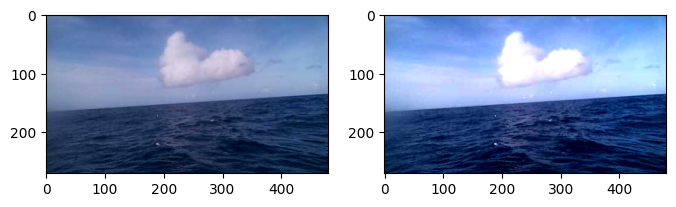

enhancement_type: contrast
enhance_factor: 4


In [11]:
# test enhancement_engine function with a panel
panel_path = '../images/panels/51101/2022_11_7_20_9'
#!panel_normalizer(panel_path)
enhancement_engine(panel_path + '/norm_panel_1.png',enhancement_type='contrast',enhance_factor=4,verbose=True)

type for contrast_value: <class 'int'>
 contrast_value: 102
type for benchmark_contrast: <class 'list'>
 benchmark_contrast: [126, 126]
type for image: <class 'PIL.PngImagePlugin.PngImageFile'>
 image: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=480x270 at 0x7FB672679400>


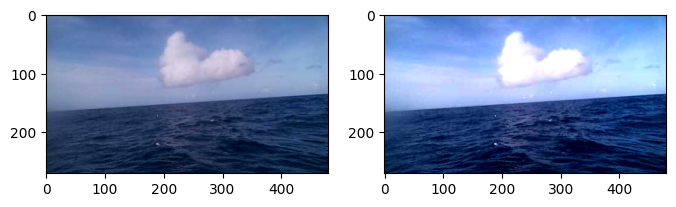

contrast_value: (102, 102)
contrast_factor: 1.2352941176470589
benchmark_contrast: 126
brightness: 0.4836891155478389
contrast_value: (102, 102)
contrast_factor: 1.2352941176470589
benchmark_contrast: 126
benchmark_brightness: 0.49032754026813224


In [12]:
make_like_benchmark(panel_path + '/norm_panel_1.png',benchmark_contrast, benchmark_brightness,verbose=True)

from PIL import Image, ImageFilter
#Read image
im = Image.open( 'image.jpg' )
#Display image
im.show()
 

from PIL import ImageEnhance
enh = ImageEnhance.Contrast(im)
enh.enhance(1.8).show("30% more contrast")

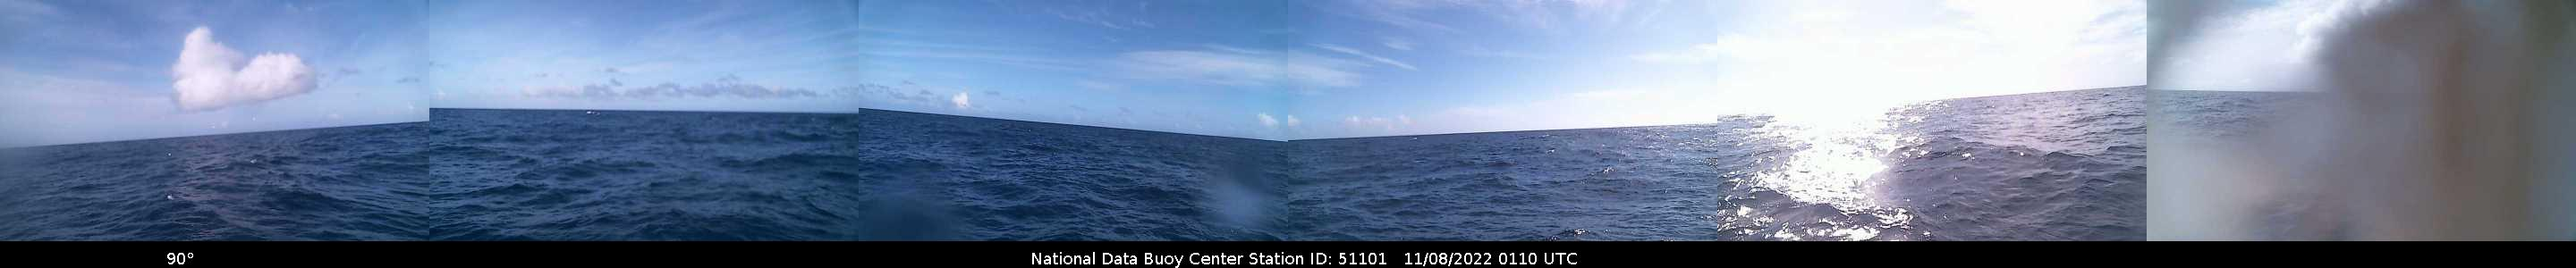

In [13]:
# let's test the panel normalizer function on images/panels/51101/2022_11_7_20_9/ that has images with different brightness values and see if the function normalizes the images to have the same brightness value
# first let's look at the exact image from the buoys folder that was used to create the panel
display(Image.open('../images/buoys/51101/2022_11_7_20_9.jpg'))

In [14]:
panel_folder_path = '../images/panels/51101/2022_11_7_20_48' # the path to the panel folder
panel_normalizer(panel_folder_path) # normalize the images in the panel folder


/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_91205/2444965082.py:139: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, contrast, enhance, or color') # make sure the enhancement_type is valid
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_91205/2444965082.py:139: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, contrast, enhance, or color') # make sure the enhancement_type is valid
ic| 2444965082.py:202 in panel_normalizer() at 23:24:34.736
/var/folders/34/d1tlq3k91hb0lj6x90xpzb4r0000gn/T/ipykernel_91205/2444965082.py:139: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(enhancement_type in ['brightness','contrast','enhance','color'], 'enhancement_type must be brightness, c

<PIL.Image.Image image mode=RGB size=2880x270 at 0x7FB680FAC130>
<class 'PIL.Image.Image'>
error in panel_normalizer read


In [15]:
# using matplotlib to display the images in the panel folder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import glob
import re

def display_panel(year,month,day,buoy):
    """
    display_panel takes a year, month, day and buoy and displays the panel for the day, month and year for the buoy.

    Parameters

    :param year: the year of the panel to be displayed
    :type year: int
    :param month: the month of the panel to be displayed
    :type month: int
    :param day: the day of the panel to be displayed
    :type day: int
    :param buoy: the buoy of the panel to be displayed
    :type buoy: int
    """
    # cast all the parameters to strings
    year = str(year)
    month = str(month)
    day = str(day)
    buoy = str(buoy)
    
    panel_folder_path = f'../images/panels/{buoy}/{year}_{month}_{day}' # the path to the panel folder (missing any random number at the end) Use glob to find the folder with the random number at the end
    panel_folder_path = glob.glob(panel_folder_path + '*')[0] # get the path to the panel folder with the random number at the end
    panel_folder_path = panel_folder_path + '/' # add a / to the end of the path
    # get the list of images in the panel folder
    images = os.listdir(panel_folder_path)
    # drop .DS_Store from the list
    images = [image for image in images if image != '.DS_Store']
    # sort the images in the panel folder
    images.sort()


    # step 1. get the list of images in the panel folder and do the following.
    # For each image in the panel folder, display the image, display the image as a column on a graph and display the set of images as a row on the graph. Annotations are added to the graph to show the brightness value of the image and the panel number. The graph is displayed after it is filled with all the images in the panel folder.
    # create a matplotlib figure that is made for a 3x2 grid of images that are 333 × 300 pixels in size. This is the size of the images in the panel folder
    fig = plt.figure(figsize=(6, 6)) # create a figure
    columns = 3 # set the number of columns
    rows = 2 # set the number of rows
    # go through the images in the panel folder
    for i in range(1, columns*rows +1):
        # get the image name
        image_name = images[i-1]
        # open the image
        image = Image.open(panel_folder_path + '/' + image_name)
        # convert the image to greyscale
        image = image.convert('L')
        # get the brightness value of the image
        brightness_value = calculate_brightness(image)
        # add the image to the graph
        fig.add_subplot(rows, columns, i)
        # display the image
        plt.imshow(image)
        # add the image name to the graph
        plt.title(image_name)
        # add the brightness value to the graph
        plt.text(0, 0, brightness_value, color='red')
        # add the panel number to the graph
        plt.text(0, 10, i, color='red')
    # display the graph
    plt.show()



In [16]:
# step 2. Now, let's normalize the images in the panel folder and do the following.
# We want the contrast, and brightness of the image to be within 5% of the median brightness value of the images in the panel folder (which has 6 images). We want the brightness of the image to be within 5% of the median brightness value of the images in the panel folder. We want the contrast of the image to be within 5% of the median brightness value of the images in the panel folder. To make the images in the panel folder have the same brightness value, we will use the panel_normalizer function to normalize the images in the panel folder. We will then display the images in the panel folder as a row on the graph we made above. Annotations are added to the graph to show the brightness value of the image and the panel number. The graph is displayed after it is filled with all the images in the panel folder.
# normalize the images in the panel folder
panel_normalizer(panel_folder_path)
print('the folder we are normalizing is: ', panel_folder_path)
images = os.listdir(panel_folder_path) # get the list of images in the panel folder
images = [image for image in images if image != '.DS_Store'] # drop .DS_Store from the list
images.sort() # sort the images in the panel folder

# create a matplotlib figure that is made for a 3x2 grid of images that are 333 × 300 pixels in size. This is the size of the images in the panel folder

ic| 2444965082.py:202 in panel_normalizer() at 23:24:35.299
ic| 2444965082.py:206 in panel_normalizer() at 23:24:35.343
ic| 2444965082.py:209 in panel_normalizer() at 23:24:35.353
ic| 2444965082.py:211 in panel_normalizer() at 23:24:35.363
ic| 2444965082.py:214 in panel_normalizer() at 23:24:35.373
ic| 2444965082.py:217 in panel_normalizer() at 23:24:35.383
ic| 2444965082.py:221 in panel_normalizer() at 23:24:35.400
ic| 2444965082.py:224 in panel_normalizer() at 23:24:35.412


<PIL.Image.Image image mode=RGB size=2880x270 at 0x7FB64001ED60>
<class 'PIL.Image.Image'>
error in panel_normalizer read
the folder we are normalizing is:  ../images/panels/51101/2022_11_7_20_48


ic| 2444965082.py:202 in panel_normalizer() at 23:24:35.637
ic| 2444965082.py:206 in panel_normalizer() at 23:24:35.680
ic| 2444965082.py:209 in panel_normalizer() at 23:24:35.691
ic| 2444965082.py:211 in panel_normalizer() at 23:24:35.699
ic| 2444965082.py:214 in panel_normalizer() at 23:24:35.710
ic| 2444965082.py:217 in panel_normalizer() at 23:24:35.723
ic| 2444965082.py:221 in panel_normalizer() at 23:24:35.741
ic| 2444965082.py:224 in panel_normalizer() at 23:24:35.756


<PIL.Image.Image image mode=RGB size=2880x270 at 0x7FB680D12FA0>
<class 'PIL.Image.Image'>
error in panel_normalizer read
normalized_image_name:  2022_11_7_20_48_stitched_1_panels.png
>> base_path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
 >>> image path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
file already exists
 >>> image path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
file already exists
 >>> image path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
file already exists
normalized_image_name:  2022_11_7_20_48_stitched_2_panels.png
>> base_path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
 >>> image path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
file already exists
 >>> image path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
file already exists
 >>> image path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
file already exists
normalized_image_name:  panel_1.png
>> base_path: ../images/panels/51101/2022_11_7_20_9/panel_1.png
 >>>

ValueError: num must be 1 <= num <= 18, not 19

<Figure size 1800x500 with 0 Axes>

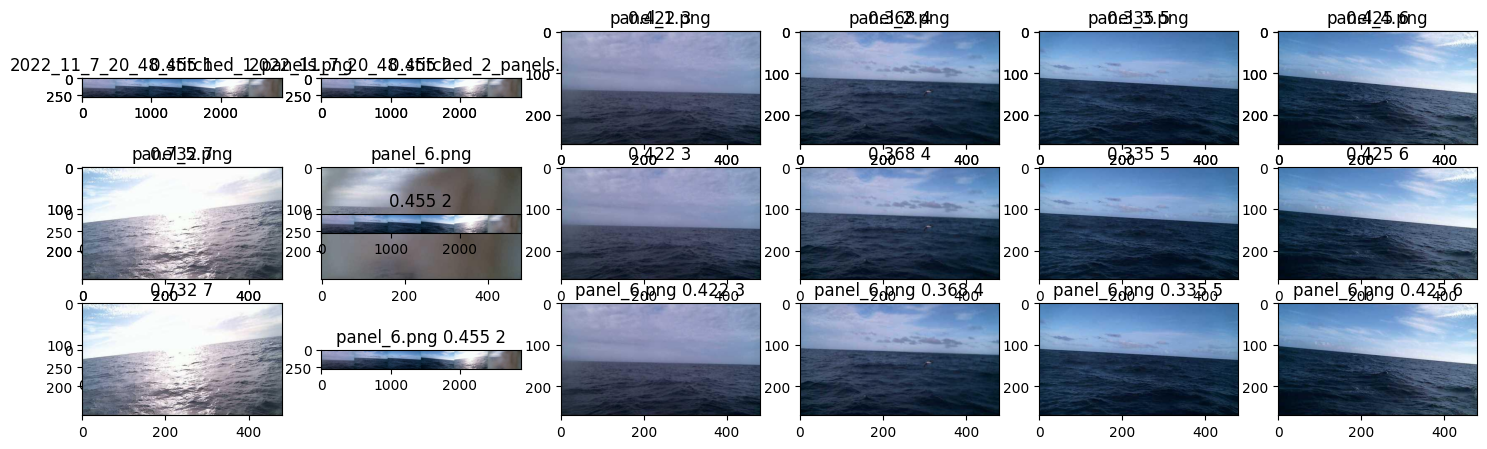

In [17]:

fig = plt.figure(figsize=(18,5)) # create a figure
plt.font_size = 10 # set the font size
columns = 6 # set the number of columns
rows = 3 # set the number of rows

# I have three rows that I want to show
# row 1 - the original images
# row 2 - the normalized images (using the panel_normalizer function)
# row 3 - the enhanced images (enhanced using the enhancement_engine function)

row_2 = [] # create a list to hold the normalized images
row_3 = [] # create a list to hold the enhanced images

# run panel_normalizer on the images in the panel folder
panel_normalizer(panel_folder_path)

fig = plt.figure(figsize=(18,5)) # create a figure

for index, image_name in enumerate(images):
    try:
        # normalized image (find the image with the same name but with with _normalized at the end)
        # find the image with the same name but with with _normalized at the end
        normalized_image_name = re.sub('.jpg', '_normalized.jpg', image_name)
        # open the normalized image
        normalized_image = Image.open(panel_folder_path + '/' + normalized_image_name)
        # add the normalized image to the list of normalized images
        print('normalized_image_name: ', normalized_image_name)
        row_2.append(normalized_image)
    except Exception as e:
        print(e)
        # create a blank image if the normalized image does not exist (this is the case for the first image in the panel folder)
        normalized_image = Image.new('L', (333, 300), color = 'white')
        # add the normalized image to the list of normalized images
        row_2.append(normalized_image)
    
    try:
        # enhance the image
        enhanced_image = enhancement_engine(image)
        # add the enhanced image to the list of enhanced images
        # enhanced image (find the image with the same name but with with _enhanced at the end)
        # find the image with the same name but with with _enhanced at the end
        enhanced_image_name = re.sub('.jpg', '_enhanced.jpg', image_name)
        # open the enhanced image
        enhanced_image = Image.open(panel_folder_path + '/' + enhanced_image_name)
        # add the enhanced image to the list of enhanced images
        row_3.append(enhanced_image)
        # show the enhanced image with matplotlib
        fig.add_subplot(rows, columns, index+1)
        plt.imshow(enhanced_image)
        plt.title(enhanced_image_name)
        # plt.text(0, 0, calculate_brightness(enhanced_image), color='red')
        # plt.text(0, 10, index+1, color='red')
    
    except Exception as e:
        print(e)
        # create a blank image if the enhanced image does not exist (this is the case for the first image in the panel folder)
        enhanced_image = Image.new('L', (333, 300), color = 'white')
        # add the enhanced image to the list of enhanced images
        row_3.append(enhanced_image)


# go through the images for all three rows in the panel folder using enumerate
for index, image_name in enumerate(images):
    # get the image name
    image_name = images[index]
    # open the image
    image = Image.open(panel_folder_path + '/' + image_name)
    # convert the image to greyscale
    image2 = image.convert('L')
    # get the brightness value of the image
    brightness_value = calculate_brightness(image2)
    # add the image to the graph
    fig.add_subplot(rows, columns, index+1)
    plot_title = str(str(round(brightness_value, 3)) + ' ' + str(index+1))
    plt.title(plot_title) # add the image name to the graph as the title
    # display the image
    plt.imshow(image)
    
    # include brightness (to 3 decimal places) and panel number (to 0 decimal places) in the title
    # plt.title(image_name + ' ' + str(round(brightness_value, 3)) + ' ' + str(index+1))
    # each_title = str(image_name + ' ' + str(round(brightness_value, 3)) + ' ' + str(index+1))
    # string_bright = str(brightness_value) + ' ' + image_name
    # add the brightness value to the graph
    # plt.text(0, 0, brightness_value, color='red')
    # add the panel number to the graph
    # plt.text(0, 10, index+1, color='red')
    
    # add the normalized image to the graph
    fig.add_subplot(rows, columns, index+1+columns)
    # display the normalized image
    plt.imshow(row_2[index])
    # add the normalized image name to the graph
    plot_title = str(str(round(brightness_value, 3)) + ' ' + str(index+1))
    plt.title(plot_title)
    # add the normalized brightness value to the graph
    # plt.text(0, 0, brightness_value, color='red')
    # add the normalized panel number to the graph
    # plt.text(0, 10, index+1, color='red')
    plot_title = str(str(round(brightness_value, 3)) + ' ' + str(index+1))
    # add the enhanced image to the graph
    fig.add_subplot(rows, columns, index+1+columns*2)
    # display the enhanced image
    plt.imshow(row_3[index])
    # add the enhanced image name to the graph
    plt.title(str(enhanced_image_name + ' ' + str(round(brightness_value, 3)) + ' ' + str(index+1)))
    # add the enhanced brightness value to the graph
    # plt.text(0, 0, brightness_value, color='red')
    # add the enhanced panel number to the graph
    # plt.text(0, 10, index+1, color='red')



plt.suptitle('Comparison of Normalized Images', fontsize=20)

#Graham: Copilot! Why is this index Error happening?
"""
    IndexError                                Traceback (most recent call last)
Cell In [256], line 10
    8 if i == len(images):
    9     continue
---> 10 image_name = images[i-1]
    11 # open the image
    12 image = Image.open(panel_folder_path + '/' + image_name)

IndexError: list index out of range
"""
#* Copilot: I think you should use a for loop instead of a while loop. I also think you should use the enumerate function to get the index and the value of the list at the same time.
# for example, you can do this:
# for index, value in enumerate(images):
#     print(index, value)




# display the graph
plt.tight_layout()
plt.show()

In [ ]:
def stitchImages(im1,im2):
    # adapted from: https://stackoverflow.com/questions/10657383/stitching-photos-together
    '''Takes 2 PIL Images and returns a new image that 
    appends the two images side-by-side. '''

    # if im1 is a string, load the image from the path
    if isinstance(im1, str):
        im1 = Image.open(im1)
    # if im2 is a string, load the image from the path 
    if isinstance(im2, str):
        im2 = Image.open(im2)
    
    
    # get the width and height of the images
    width1, height1 = im1.size
    width2, height2 = im2.size

    # create a new image with the combined width and the max height
    result_width = width1 + width2
    result_height = max(height1, height2)
    result = Image.new('RGB', (result_width, result_height))

    # paste the first image into the result image
    result.paste(im1, (0, 0))
    # paste the second image into the result image
    result.paste(im2, (width1, 0))
    # return the result image
    return result # result.save('result.jpg')

In [ ]:
# test the stitchImages function
im1 = Image.open(panel_folder_path + '/' + images[0])
im2 = Image.open(panel_folder_path + '/' + images[1])
stitchImages(im1,im2)



"""
Graham: Copilot! Why is this Error happening?
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In [452], line 2
      1 # test the stitchImages function
----> 2 stitchImages(row_2[0], row_2[1])

Cell In [450], line 7, in stitchImages(im1, im2)
      3 '''Takes 2 PIL Images and returns a new image that 
      4 appends the two images side-by-side. '''
      6 # select the image with the fewest rows and fill in enough empty rows
----> 7 rows1 = im1.shape[0] # number of rows in the first image
      8 rows2 = im2.shape[0] # number of rows in the second image
     10 print('debugging type of im1 and im2')

File ~/opt/anaconda3/envs/EmersonWriter/envs/pyseas_env/lib/python3.9/site-packages/PIL/Image.py:517, in Image.__getattr__(self, name)
    515     deprecate("Image categories", 10, "is_animated", plural=True)
    516     return self._category
--> 517 raise AttributeError(name)

AttributeError: shape

Copilot: I think you should use the numpy array shape function instead of the PIL Image shape function. You can do this by adding .shape to the end of the numpy array.
Change `im1 = np.concatenate((im1,np.zeros((rows2-rows1,im1.shape[1]))), axis=0)` to `im1 = np.concatenate((im1,np.zeros((rows2-rows1,im1.shape[1]))), axis=0).shape`



"""

'\nGraham: Copilot! Why is this Error happening?\n---------------------------------------------------------------------------\nAttributeError                            Traceback (most recent call last)\nCell In [452], line 2\n      1 # test the stitchImages function\n----> 2 stitchImages(row_2[0], row_2[1])\n\nCell In [450], line 7, in stitchImages(im1, im2)\n      3 \'\'\'Takes 2 PIL Images and returns a new image that \n      4 appends the two images side-by-side. \'\'\'\n      6 # select the image with the fewest rows and fill in enough empty rows\n----> 7 rows1 = im1.shape[0] # number of rows in the first image\n      8 rows2 = im2.shape[0] # number of rows in the second image\n     10 print(\'debugging type of im1 and im2\')\n\nFile ~/opt/anaconda3/envs/EmersonWriter/envs/pyseas_env/lib/python3.9/site-packages/PIL/Image.py:517, in Image.__getattr__(self, name)\n    515     deprecate("Image categories", 10, "is_animated", plural=True)\n    516     return self._category\n--> 517 ra

In [ ]:
# Now Stitch the images together into a single image (horizontal). You will be creating three images, one for each row of images.
# Go through the images from left to right and stitch them together into a single image using the stitchImages function above.
# You will need to use the stitchImages function two times, once for each row of images.

# images in the second row first
for i in range(len(row_2)):
    if i == 0:
        # set the first image in the row as the image to stitch to
        image_to_stitch_to = row_2[i]
    else:
        # stitch the image to the image to stitch to
        image_to_stitch_to = stitchImages(image_to_stitch_to, row_2[i])

# save the stitched image as '{date}_stitched_panels.png' in panel_folder_path (e.g. 2021-03-01_stitched_panels.png)
# Where the date is the date of the first image in the folder. (This is the name of the folder)
date = panel_folder_path.split('/')[-1]
filename = panel_folder_path + '/' + date + '_stitched_1_panels.png'
if not os.path.isfile(filename):
    image_to_stitch_to.save(filename)

# images in the third row
for i in range(len(row_3)):
    if i == 0:
        # set the first image in the row as the image to stitch to
        image_to_stitch_to = row_3[i]
    else:
        # stitch the image to the image to stitch to
        image_to_stitch_to = stitchImages(image_to_stitch_to, row_3[i])

# save the stitched image as '{date}_stitched_panels.png' in panel_folder_path (e.g. 2021-03-01_stitched_panels.png)
# Where the date is the date of the first image in the folder. (This is the name of the folder)
date = panel_folder_path.split('/')[-1]
filename = panel_folder_path + '/' + date + '_stitched_2_panels.png'

print(filename) # debugging
# if the file does not exist, save the image to the fil
if not os.path.isfile(filename):
    image_to_stitch_to.save(filename)


../images/panels/51101/2022_11_7_20_48/2022_11_7_20_48_stitched_2_panels.png


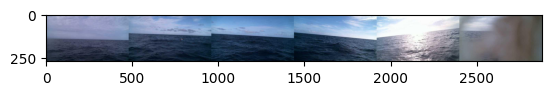

In [ ]:
# show the stitched image
plt.imshow(image_to_stitch_to)

# Stitching with CV2

In [27]:
import cv2

stitcher = cv2.Stitcher_create(mode=cv2.Stitcher_PANORAMA)

# check that the images at the paths exist and are not empty (i.e. have a size greater than 0)
pic_1 = panel_folder_path + '/' + images[0]
pic_2 = panel_folder_path + '/' + images[1]

if os.path.isfile(pic_1) and os.path.getsize(pic_1) > 0 and os.path.isfile(pic_2) and os.path.getsize(pic_2) > 0:
    # read the images
    im1 = cv2.imread(pic_1)
    im2 = cv2.imread(pic_2)

    # stitch the images together
    status, stitched = stitcher.stitch((im1, im2))

    # if the status is 0, the images were stitched together successfully
    if status == 0:
        # save the stitched image
        cv2.imwrite(panel_folder_path + '/' + 'stitched_panels.png', stitched)
    else:
        print('Error: images could not be stitched together.')

# foo = cv2.imread(pic_1)
# bar = cv2.imread(pic_2)
# result = stitcher.stitch((foo,bar))

# cv2.imwrite(panel_folder_path + '/' + 'cv2_stitch.jpg', result[1])

# Graham: Copilot! Why am I getting the AttributeError: module 'cv2' has no attribute 'createStitcher'?
# Copilot: I think you should use the cv2.Stitcher_create() function instead of the cv2.createStitcher() function.
# Change `stitcher = cv2.createStitcher(False)` to `stitcher = cv2.Stitcher_create(False)`

# Graham: Okay, so I did that and now I'm getting the AttributeError: error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'. I am not sure if you're familiar with this error.

# Copilot: This error is saying that the image is empty. I think you should check if the image is empty before you try to save it. You can do this by adding an if statement before the save function.

Error: images could not be stitched together.


One Option

```python

from imutils import paths
import numpy as np 
import argparse
import imutils
import cv2

### Resources
# tutorial -->  https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/
# paper    -->  http://matthewalunbrown.com/papers/ijcv2007.pdf


### Code
# argument parsing
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--images", type=str, required=True, help="path to input directory of images to stitch")
ap.add_argument("-o", "--output", type=str, required=True, help="path to the output image")
args = vars(ap.parse_args())


# put image paths into list so any in the directory can be read 
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images(args["images"])))
images = [] # list of images to be stitched
 
# loop through image list and load images to list
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	images.append(image)

# stitch images
print("[INFO] stitching images...")


if imutils.is_cv3(): # OpenCV 3
	stitcher = cv2.createStitcher()
else: # OpenCV 4
	stitcher = cv2.Stitcher_create() 

(status, stitched) = stitcher.stitch(images) # call method to stitch images

# evaluate status and display image if successfully stitched
if status == 0: # status is 0 for successful operation
	cv2.imwrite(args["output"], stitched) # write to output file
	cv2.imshow("Stitched", stitched) # display stitched image
	cv2.waitKey(0)

else: # status is 1, 2 or 3 depending on error (see documentation)
	print("[INFO] image stitching failed ({})".format(status)) # failure message


### Takeaways
# Easy to use
# Slow, not for real-time
# Can implement additional cropping to make image more rectangular
# For real-time, see https://www.pyimagesearch.com/2016/01/25/real-time-panorama-and-image-stitching-with-opencv/

```

Another Option

```python

# import the necessary packages
import numpy as np
import imutils
import cv2
class Stitcher:
	def __init__(self):
		# determine if we are using OpenCV v3.X and initialize the
		# cached homography matrix
		self.isv3 = imutils.is_cv3()
		self.cachedH = None
    def stitch(self, images, ratio=0.75, reprojThresh=4.0):
        # unpack the images
        (imageB, imageA) = images
        # if the cached homography matrix is None, then we need to
        # apply keypoint matching to construct it
        if self.cachedH is None:
            # detect keypoints and extract
            (kpsA, featuresA) = self.detectAndDescribe(imageA)
            (kpsB, featuresB) = self.detectAndDescribe(imageB)
            # match features between the two images
            M = self.matchKeypoints(kpsA, kpsB,
                featuresA, featuresB, ratio, reprojThresh)
            # if the match is None, then there aren't enough matched
            # keypoints to create a panorama
            if M is None:
                return None
            # cache the homography matrix
            self.cachedH = M[1]
        # apply a perspective transform to stitch the images together
        # using the cached homography matrix
        result = cv2.warpPerspective(imageA, self.cachedH,
            (imageA.shape[1] + imageB.shape[1], imageA.shape[0]))
        result[0:imageB.shape[0], 0:imageB.shape[1]] = imageB
        # return the stitched image
        return result
```

These are some ways people stitch images together. 

In [28]:
import imutils
from tqdm import tqdm

In [29]:
im1 = cv2.imread(pic_1)
im2 = cv2.imread(pic_2)

In [30]:
stitcher = cv2.Stitcher_create(mode=cv2.Stitcher_PANORAMA)# create the stitcher object with the mode set to PANORAMA
if imutils.is_cv3():
    (status, stitched) = stitcher.stitch((im1, im2))# stitch the images together
else:
    (status, stitched) = stitcher.stitch([im1, im2])

#  evaluate status and display image if successfully stitched
if status == 0: # status is 0 for successful operation
    cv2.imshow("Stitched", stitched)
    cv2.waitKey(0)

else: # status is 1, 2 or 3 depending on error (see documentation)
	print("[INFO] image stitching failed ({})".format(status)) # failure message
    # status is 1 for not enough keypoints detected in one of the images, 2 for failure to find homography matrix, 3 for failure to do perspective transform


[INFO] image stitching failed (1)


In [31]:
# Can I apply this to a large folder of images?
folder = '../images/panels'
# use glob to get all the files in the folder and all the subfolders (images)
files = glob.glob(folder + '/**/*.png', recursive=True)


In [32]:
# make a blank image to stitch to
image_to_stitch_to = Image.new('RGB', (1000, 1000))
# save it as the master image
image_to_stitch_to.save(folder + '/master.png')
# set the master image as the image to stitch to
image_to_stitch_to = Image.open(folder + '/master.png')
# loop through the files
for file in tqdm(files):
    # open the image
    image = Image.open(file)
    # stitch the image to the image to stitch to
    image_to_stitch_to = stitchImages(image_to_stitch_to, image)
    # save the stitched image
    image_to_stitch_to.save('../images/master.png')


  0%|          | 0/304069 [00:00<?, ?it/s]


NameError: name 'stitchImages' is not defined

In [ ]:
def stitch_me(img1):
    stitcher = cv2.Stitcher_create(mode=cv2.Stitcher_PANORAMA)# create the stitcher object with the mode set to PANORAMA
    pano = cv2.imread('../images/master.png') # read the master image
    print(type(pano)) # debugging - check the type of the image
    # (status, stitched) = stitcher.stitch((pano, img1))# stitch the images together
    # rewrite the line above with masks included
    
    # try to make the masks without using .shape (which is not working)
    # mask1 = np.zeros(pano.shape[:2], dtype=np.uint8) # create a mask for the master image (all zeros)
    # mask2 = np.zeros(img1.shape[:2], dtype=np.uint8) # create the masks
    # # without using .shape
    mask1 = np.zeros((pano.shape[0], pano.shape[1]), dtype=np.uint8) # create a mask for the master image (all zeros)
    mask2 = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8) # create the masks

    (status, stitched) = stitcher.stitch((pano, img1), masks=(mask1, mask2))
    if status == 0: # status is 0 for successful operation
        cv2.imwrite('../images/master.png', stitched) # save the stitched image
    else: # status is 1, 2 or 3 depending on error (see documentation)
        print("[INFO] image stitching failed ({})".format(status)) # failure message
        # status is 1 for not enough keypoints detected in one of the images, 2 for failure to find homography matrix, 3 for failure to do perspective transform

    

In [ ]:
print(files[0:10])

NameError: name 'files' is not defined

In [ ]:
from PIL import Image
import numpy as np
from tqdm import tqdm
import cv2


for i in tqdm(range(len(files))):
    print(files[i])
    try:
        if i == 0:
            # set the first image in the row as the image to stitch to
            image_to_stitch_to = files[i]
        else:
            # stitch the image to the image to stitch to with cv2 stitch_me(im2)
            # check the type of the image to stitch to
            if type(image_to_stitch_to) == str:
                # read the image
                image_to_stitch_to = cv2.imread(image_to_stitch_to,0)

            result = stitch_me(image_to_stitch_to) # this is the image to stitch to in the next iteration
            # save the stitched image as 'master_stitch.png' in the /images folder
            result.save('../images/master.png')
    except:
        print('Error')

"""

My Code:
def stitch_me(im2):
    stitcher = cv2.Stitcher_create(mode=cv2.Stitcher_PANORAMA)# create the stitcher object with the mode set to PANORAMA
    im1 = cv2.imread('../images/master_stitch.png')
    if imutils.is_cv3():
        (status, stitched) = stitcher.stitch((im1, im2))# stitch the images together
    else:
        (status, stitched) = stitcher.stitch([im1, im2])

    #  evaluate status and display image if successfully stitched
    if status == 0: # status is 0 for successful operation
        # save the stitched image as 'master_stiched.png' in the folder '../images'
        cv2.imwrite('../images/master_stitch.png', stitched)
        print('stitched')
    else: # status is 1, 2 or 3 depending on error (see documentation)
        #print("[INFO] image stitching failed ({})".format(status)) # failure message
        # status is 1 for not enough keypoints detected in one of the images, 2 for failure to find homography matrix, 3 for failure to do perspective transform
        pass
    
Error:
Error: error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'stitch'
> Overload resolution failed:
>  - Can't parse 'images'. Sequence item with index 1 has a wrong type
>  - Can't parse 'images'. Sequence item with index 1 has a wrong type
>  - Stitcher.stitch() missing required argument 'masks' (pos 2)
>  - Stitcher.stitch() missing required argument 'masks' (pos 2)

# Copilot: I see you are using the cv2.Stitcher_create() function. Good. That is not the problem then. The error is saying that it can't parse the images. I think you should check the type of the images. You can do this by adding an if statement before the stitch function.

"""

NameError: name 'files' is not defined

The result.